In [1]:
from pyspark.sql import SparkSession

spark = (SparkSession.builder.appName("Capstone")\
         .config("hive.metastore.uris","thrift://ip-10-1-2-24.ap-south-1.compute.internal:9083")\
         .enableHiveSupport().getOrCreate())

In [2]:
spark

In [3]:
dept_manager_j=spark.sql("select * from jerryalab.dept_managers_j")

In [4]:
dept_emp_j=spark.sql("select * from jerryalab.dept_emp_j")

In [5]:
departments_j=spark.sql("select * from jerryalab.departments_j")

In [6]:
salaries_j=spark.sql("select * from jerryalab.salaries_j")

In [7]:
titles_j=spark.sql("select * from jerryalab.titles_j")

In [8]:

employeesj=spark.sql("select * from jerryalab.employees_j")

In [9]:
dept_manager_j.createOrReplaceTempView("dept_manager")

In [10]:
dept_emp_j.createOrReplaceTempView("dept_employee")

In [11]:
departments_j.createOrReplaceTempView("department")

In [12]:
salaries_j.createOrReplaceTempView("salary")

In [13]:
titles_j.createOrReplaceTempView("title")

In [14]:
employeesj.createOrReplaceTempView("employee")

Querries and EDA

In [15]:
#list showing employee number, last name, first name, sex, and salary for each employee
Querry1=spark.sql("select e.emp_no, e.last_name,e.first_name, e.sex, s.salary FROM employee e JOIN salary s ON e.emp_no = s.emp_no")

In [16]:
Querry1.show()

+------+----------+----------+---+------+
|emp_no| last_name|first_name|sex|salary|
+------+----------+----------+---+------+
|473302|  Zallocco|  Hideyuki|  M| 40000|
|475053| Delgrande|     Byong|  F| 53422|
| 57444|      Babb|     Berry|  F| 48973|
|421786|  Verhoeff|     Xiong|  M| 40000|
|282238|   Baumann|Abdelkader|  F| 40000|
|263976|  Cusworth|      Eran|  M| 40000|
|273487|   Parfitt| Christoph|  M| 56087|
|461591|  Samarati|    Xudong|  M| 40000|
|477657| Magliocco|    Lihong|  M| 54816|
|219881|     Speek| Kwangyoen|  F| 40000|
| 29920|     Tyugu|   Shuichi|  F| 40000|
|208153|      Lunn|   Abdulah|  M| 50183|
| 13616|     Lorho|     Perry|  F| 40000|
|246449|Bultermann|     Subbu|  F| 87084|
| 21529|  Zallocco|     Bojan|  M| 40000|
| 17934|  Wuwongse|  Bilhanan|  M| 48795|
| 48085|      Gilg|Venkatesan|  M| 63016|
|239838|     Dulli|   Naftali|  M| 57715|
|240129|    Karnin|     Roddy|  M| 43548|
|205246|    Demizu|     Nevio|  F| 80252|
+------+----------+----------+---+

In [17]:
# A list showing first name, last name, and hire date for employees who were hired in 1986.
Querry2=spark.sql('SELECT first_name, last_name, hire_date FROM employee WHERE year(hire_date)=1986 ORDER BY hire_date')

In [18]:
#A list showing the manager of each department with the following information: department number, department name, the manager's employee number, last name, first name.
Querry3=spark.sql("SELECT d.dept_no, d.dept_name,dm.emp_no, e.first_name, e.last_name from department d join dept_manager dm on d.dept_no =dm.dept_no join employee e on dm.emp_no = e.emp_no")

In [19]:
Querry3.show()

+-------+--------------------+------+-----------+------------+
|dept_no|           dept_name|emp_no| first_name|   last_name|
+-------+--------------------+------+-----------+------------+
|   d009|  "Customer Service"|111877|    Xiaobin|    Spinelli|
|   d008|          "Research"|111534|     Hilary|      Kambil|
|   d006|"Quality Management"|110765|     Rutger|     Hofmeyr|
|   d004|        "Production"|110420|      Oscar|    Ghazalie|
|   d006|"Quality Management"|110725|  Peternela|     Onuegbe|
|   d001|         "Marketing"|110022|  Margareta|  Markovitch|
|   d007|             "Sales"|111035|Przemyslawa|   Kaelbling|
|   d005|       "development"|110511|   DeForest|    Hagimont|
|   d005|       "development"|110567|       Leon|    DasSarma|
|   d003|   "Human Resources"|110183|    Shirish|Ossenbruggen|
|   d009|  "Customer Service"|111939|    Yuchang|     Weedman|
|   d002|           "Finance"|110114|      Isamu|  Legleitner|
|   d006|"Quality Management"|110854|       Dung|      

In [20]:
#A list showing the department of each employee with the following information: employee number, last name, first name, and department name.
Querry4=spark.sql("select de.emp_no, e.first_name, e.last_name, d.dept_name from dept_emp de join employee e on de.emp_no = e.emp_no join department d on de.dept_no = d.dept_no ")

In [21]:
Querry4.show()

+------+----------+----------+--------------------+
|emp_no|first_name| last_name|           dept_name|
+------+----------+----------+--------------------+
|473302|  Hideyuki|  Zallocco|           "Finance"|
|475053|     Byong| Delgrande|        "Production"|
| 57444|     Berry|      Babb|        "Production"|
|421786|     Xiong|  Verhoeff|   "Human Resources"|
|282238|Abdelkader|   Baumann|"Quality Management"|
|263976|      Eran|  Cusworth|"Quality Management"|
|273487| Christoph|   Parfitt|   "Human Resources"|
|461591|    Xudong|  Samarati|           "Finance"|
|477657|    Lihong| Magliocco|"Quality Management"|
|219881| Kwangyoen|     Speek|  "Customer Service"|
| 29920|   Shuichi|     Tyugu|        "Production"|
|208153|   Abdulah|      Lunn|       "development"|
| 13616|     Perry|     Lorho|          "Research"|
| 13616|     Perry|     Lorho|       "development"|
|246449|     Subbu|Bultermann|             "Sales"|
| 21529|     Bojan|  Zallocco|       "development"|
| 17934|  Bi

In [22]:
#A list showing first name, last name, and sex for employees whose first name is "Hercules" and last names begin with "B.“
Querry5=spark.sql("select first_name, last_name, sex from employee where first_name = 'Hercules' and  last_name Like 'B%'")

In [23]:
Querry5.show()

+----------+-------------+---+
|first_name|    last_name|sex|
+----------+-------------+---+
|  Hercules|         Baer|  M|
|  Hercules|        Biron|  F|
|  Hercules|        Birge|  F|
|  Hercules|      Berstel|  F|
|  Hercules|    Bernatsky|  M|
|  Hercules|         Bail|  F|
|  Hercules|       Bodoff|  M|
|  Hercules|     Benantar|  F|
|  Hercules|      Basagni|  M|
|  Hercules|Bernardinello|  F|
|  Hercules|   Baranowski|  M|
|  Hercules|      Bisiani|  F|
|  Hercules|   Benzmuller|  M|
|  Hercules|         Bahr|  M|
|  Hercules|        Biran|  F|
|  Hercules|         Bain|  F|
|  Hercules|      Brendel|  F|
|  Hercules|      Buchter|  M|
|  Hercules|     Barreiro|  M|
|  Hercules|         Baak|  M|
+----------+-------------+---+



In [24]:
#A list showing all employees in the Sales department, including their employee number, last name, first name, and department name.
Querry6=spark.sql("""select E.first_name,E.last_name,D.dept_no,D.dept_name
from dept_employee DE
join employee E
on DE.emp_no = E.emp_no
join department D
on DE.dept_no =D.dept_no
where D.dept_name = '"Sales"'
""")

In [25]:
Querry6.show()

+----------+-------------+-------+---------+
|first_name|    last_name|dept_no|dept_name|
+----------+-------------+-------+---------+
|     Subbu|   Bultermann|   d007|  "Sales"|
|     Nevio|       Demizu|   d007|  "Sales"|
|      Ziya|       Asmuth|   d007|  "Sales"|
|    Kellyn|    Yoshizawa|   d007|  "Sales"|
|   Elliott|         Perl|   d007|  "Sales"|
|       Gad|     Nollmann|   d007|  "Sales"|
|      Giap|     Verspoor|   d007|  "Sales"|
|      Duro|Beutelspacher|   d007|  "Sales"|
|  Harngdar|        Swick|   d007|  "Sales"|
| Nectarios|       Covnot|   d007|  "Sales"|
|  Kazuhira|    Shimshoni|   d007|  "Sales"|
|   Gilbert|    Naumovich|   d007|  "Sales"|
|    Reuven|        Munke|   d007|  "Sales"|
|     Tonny|     Skafidas|   d007|  "Sales"|
|    Parviz|       Zaumen|   d007|  "Sales"|
| Yechezkel|         Pews|   d007|  "Sales"|
| Stabislas|      Domenig|   d007|  "Sales"|
|   Chikara|     Businaro|   d007|  "Sales"|
|   Candido|       Vecchi|   d007|  "Sales"|
|    Shmue

In [26]:
#A list showing all employees in the Sales and Development departments, including their employee number, last name, first name, and department name.
Querry7=spark.sql("""select E.first_name,E.last_name,D.dept_no,D.dept_name
from dept_employee DE
join employee E
on DE.emp_no = E.emp_no
join department D
on DE.dept_no =D.dept_no
where D.dept_name = '"Sales"'
or D.dept_name='"devolopment"'
""")

In [27]:
#A list showing the frequency count of employee last names, in descending order. ( i.e., how many employees share each last name
Querry8=spark.sql("select last_name,count(last_name) as No_of_Names from employee group by last_name order by count(last_name) desc")


In [28]:
Querry8.show()

+-----------+-----------+
|  last_name|No_of_Names|
+-----------+-----------+
|       Baba|        226|
|     Gelosh|        223|
|      Coorg|        223|
|    Sudbeck|        222|
|     Farris|        222|
|     Adachi|        221|
|     Osgood|        220|
|     Neiman|        218|
|     Masada|        218|
|    Mandell|        218|
|    Wendorf|        217|
|Boudaillier|        217|
|    Solares|        216|
|     Pettis|        216|
|     Mahnke|        216|
|   Cummings|        216|
|    Kulisch|        215|
| Maksimenko|        215|
|   Birjandi|        215|
|   Collette|        215|
+-----------+-----------+
only showing top 20 rows



In [29]:
# Histogram to show the salary distribution among the employees
Querry9=spark.sql("SELECT title, sum(salary) as sum_Salary from title t JOIN employee e  on t.title_id = e.emp_title_id JOIN salary s on e.emp_no =  s.emp_no GROUP BY title")

In [30]:
Querry9.show()

+------------------+----------+
|             title|sum_Salary|
+------------------+----------+
|             Staff|6278246672|
|Assistant Engineer| 283373475|
|      Senior Staff|1556439241|
|   Senior Engineer|4741394167|
|          Engineer|2295867023|
|           Manager|   1236745|
|  Technique Leader| 735933710|
+------------------+----------+



In [31]:
import pandas as pd
import matplotlib.pyplot as plot

In [32]:
Querry9p=Querry9.toPandas()

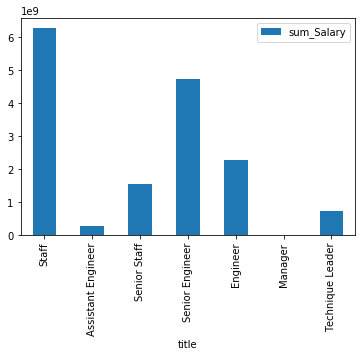

In [33]:
Querry9p.plot(kind = 'bar', x= 'title', y = 'sum_Salary')

In [34]:
# Bar graph to show the Average salary per title (designation)
Querry10=spark.sql('SELECT title, avg(salary) as AVg_Salary from title t JOIN employee e  on t.title_id = e.emp_title_id JOIN salary s on e.emp_no =  s.emp_no GROUP BY title')

In [35]:
Querry10p=Querry10.toPandas()

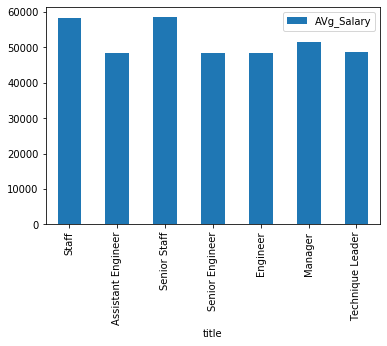

In [36]:
Querry10p.plot(kind = 'bar', x= 'title', y = 'AVg_Salary')

Joining the Tables for further visualization and modelling

In [37]:
df = employeesj.join(dept_emp_j,on = 'emp_no', how = 'left') \
        .join(departments_j, on='dept_no',how = 'left') \
        .join(salaries_j, on ='emp_no', how = 'left') \
        .join(titles_j, employeesj.emp_title_id == titles_j.title_id, 'left')


In [38]:
df.createOrReplaceTempView("Data")

Additional EDA

In [39]:
#dept name and rating count
spark.sql('select dept_name, count(last_performance_rating) from Data group by dept_name').show()

+--------------------+------------------------------+
|           dept_name|count(last_performance_rating)|
+--------------------+------------------------------+
|"Quality Management"|                         20117|
|        "Production"|                         73485|
|       "development"|                         85707|
|          "Research"|                         21126|
|             "Sales"|                         52245|
|           "Finance"|                         17346|
|   "Human Resources"|                         17786|
|         "Marketing"|                         20211|
|  "Customer Service"|                         23580|
+--------------------+------------------------------+



In [40]:
#total salary of each department
spark.sql('select dept_name, sum(salary) from Data group by dept_name').show()

+--------------------+-----------+
|           dept_name|sum(salary)|
+--------------------+-----------+
|"Quality Management"|  934555467|
|        "Production"| 3583161729|
|       "development"| 4173702462|
|          "Research"| 1032009108|
|             "Sales"| 3648379483|
|           "Finance"| 1032668378|
|   "Human Resources"|  794654412|
|         "Marketing"| 1234809182|
|  "Customer Service"| 1131808649|
+--------------------+-----------+



In [41]:
#Max salary earned by a person
spark.sql('select max(salary) from Data').show()

+-----------+
|max(salary)|
+-----------+
|     129492|
+-----------+



In [42]:
# Project distribution amongst sex
spark.sql('select sex,count(no_of_projects) from Data group by sex').show()

+---+---------------------+
|sex|count(no_of_projects)|
+---+---------------------+
|  F|               132753|
|  M|               198850|
+---+---------------------+



In [43]:
#Total salary by Gender
spark.sql('select sex,sum(salary) from Data group by sex').show()

+---+-----------+
|sex|sum(salary)|
+---+-----------+
|  F| 7028627662|
|  M|10537121208|
+---+-----------+



In [44]:
#Department name and titles
spark.sql('select dept_name,title from Data').show()

+--------------------+----------------+
|           dept_name|           title|
+--------------------+----------------+
|           "Finance"|           Staff|
|        "Production"|        Engineer|
|        "Production"|        Engineer|
|   "Human Resources"|           Staff|
|"Quality Management"| Senior Engineer|
|"Quality Management"| Senior Engineer|
|   "Human Resources"|           Staff|
|           "Finance"|    Senior Staff|
|"Quality Management"|        Engineer|
|  "Customer Service"|    Senior Staff|
|        "Production"|        Engineer|
|       "development"| Senior Engineer|
|          "Research"| Senior Engineer|
|       "development"| Senior Engineer|
|             "Sales"|           Staff|
|       "development"|        Engineer|
|       "development"|Technique Leader|
|           "Finance"|           Staff|
|        "Production"|        Engineer|
|"Quality Management"|Technique Leader|
+--------------------+----------------+
only showing top 20 rows



Model Building

In [45]:
type(df)

pyspark.sql.dataframe.DataFrame

In [46]:
df.columns

['emp_no',
 'dept_no',
 'emp_title_id',
 'birth_date',
 'first_name',
 'last_name',
 'sex',
 'hire_date',
 'no_of_projects',
 'last_performance_rating',
 'lefta',
 'last_date',
 'dept_name',
 'salary',
 'title_id',
 'title']

In [47]:
df.dtypes

[('emp_no', 'int'),
 ('dept_no', 'string'),
 ('emp_title_id', 'string'),
 ('birth_date', 'string'),
 ('first_name', 'string'),
 ('last_name', 'string'),
 ('sex', 'string'),
 ('hire_date', 'string'),
 ('no_of_projects', 'int'),
 ('last_performance_rating', 'string'),
 ('lefta', 'int'),
 ('last_date', 'string'),
 ('dept_name', 'string'),
 ('salary', 'bigint'),
 ('title_id', 'string'),
 ('title', 'string')]

ENCODING

In [48]:
numeric_features = [t[0] for t in df.dtypes if t[1] == 'int' or t[1] == 'bigint' ]
numeric_features

['emp_no', 'no_of_projects', 'lefta', 'salary']

In [49]:
categorical_features = [t[0] for t in df.dtypes if t[1] == 'string']
categorical_features

['dept_no',
 'emp_title_id',
 'birth_date',
 'first_name',
 'last_name',
 'sex',
 'hire_date',
 'last_performance_rating',
 'last_date',
 'dept_name',
 'title_id',
 'title']

In [50]:
#Any null(missings) values
from pyspark.sql.functions import isnull
df_clean = df.na.drop( how = 'any' )

In [51]:
df_clean.count() == df.count()

True

In [52]:
df.count()

331603

In [53]:
df_clean.dtypes

[('emp_no', 'int'),
 ('dept_no', 'string'),
 ('emp_title_id', 'string'),
 ('birth_date', 'string'),
 ('first_name', 'string'),
 ('last_name', 'string'),
 ('sex', 'string'),
 ('hire_date', 'string'),
 ('no_of_projects', 'int'),
 ('last_performance_rating', 'string'),
 ('lefta', 'int'),
 ('last_date', 'string'),
 ('dept_name', 'string'),
 ('salary', 'bigint'),
 ('title_id', 'string'),
 ('title', 'string')]

In [54]:
#Encoding all categorical features
from pyspark.ml.feature import OneHotEncoder, StringIndexer, VectorAssembler, PolynomialExpansion, VectorIndexer

In [55]:
SI_deptno = StringIndexer(inputCol='dept_no',outputCol='DNO')
SI_emp_title_id = StringIndexer(inputCol='emp_title_id',outputCol='EID')
SI_sex = StringIndexer(inputCol='sex',outputCol='SEXX')
SI_last_p = StringIndexer(inputCol='last_performance_rating',outputCol='LPR')
SI_deptname = StringIndexer(inputCol='dept_name',outputCol='Dname')
SI_titleid = StringIndexer(inputCol='title_id',outputCol='TID')
SI_title = StringIndexer(inputCol='title',outputCol='titles')

In [56]:
df_clean = SI_deptno.fit(df_clean).transform(df_clean)
df_clean = SI_emp_title_id.fit(df_clean).transform(df_clean)
df_clean = SI_sex.fit(df_clean).transform(df_clean)
df_clean = SI_last_p.fit(df_clean).transform(df_clean)
df_clean = SI_deptname.fit(df_clean).transform(df_clean)
df_clean = SI_titleid.fit(df_clean).transform(df_clean)
df_clean = SI_title.fit(df_clean).transform(df_clean)






In [57]:
df_clean.select('EID','SEXX','DNO','LPR','Dname','TID','titles').show()

+---+----+---+---+-----+---+------+
|EID|SEXX|DNO|LPR|Dname|TID|titles|
+---+----+---+---+-----+---+------+
|0.0| 0.0|8.0|1.0|  8.0|0.0|   0.0|
|2.0| 1.0|1.0|2.0|  1.0|2.0|   2.0|
|2.0| 1.0|1.0|1.0|  1.0|2.0|   2.0|
|0.0| 0.0|7.0|2.0|  7.0|0.0|   0.0|
|1.0| 1.0|6.0|0.0|  6.0|1.0|   1.0|
|1.0| 0.0|6.0|0.0|  6.0|1.0|   1.0|
|0.0| 0.0|7.0|1.0|  7.0|0.0|   0.0|
|3.0| 0.0|8.0|1.0|  8.0|3.0|   3.0|
|2.0| 0.0|6.0|1.0|  6.0|2.0|   2.0|
|3.0| 1.0|3.0|0.0|  3.0|3.0|   3.0|
|2.0| 1.0|1.0|3.0|  1.0|2.0|   2.0|
|1.0| 0.0|0.0|2.0|  0.0|1.0|   1.0|
|1.0| 1.0|4.0|2.0|  4.0|1.0|   1.0|
|1.0| 1.0|0.0|2.0|  0.0|1.0|   1.0|
|0.0| 1.0|2.0|2.0|  2.0|0.0|   0.0|
|2.0| 0.0|0.0|2.0|  0.0|2.0|   2.0|
|4.0| 0.0|0.0|2.0|  0.0|4.0|   4.0|
|0.0| 0.0|8.0|0.0|  8.0|0.0|   0.0|
|2.0| 0.0|1.0|1.0|  1.0|2.0|   2.0|
|4.0| 0.0|6.0|2.0|  6.0|4.0|   4.0|
+---+----+---+---+-----+---+------+
only showing top 20 rows



In [58]:
encoder=OneHotEncoder(inputCol="EID",outputCol="EID_V")
df_clean = encoder.transform(df_clean)

In [59]:
encoder=OneHotEncoder(inputCol="SEXX",outputCol="SEXX_V")
df_clean = encoder.transform(df_clean)

In [60]:
encoder=OneHotEncoder(inputCol="DNO",outputCol="DNO_V")
df_clean = encoder.transform(df_clean)

In [61]:
encoder=OneHotEncoder(inputCol="LPR",outputCol="LPR_V")
df_clean = encoder.transform(df_clean)

In [62]:
encoder=OneHotEncoder(inputCol="Dname",outputCol="Dname_V")
df_clean = encoder.transform(df_clean)

In [63]:
encoder=OneHotEncoder(inputCol="titles",outputCol="titles_V")
df_clean = encoder.transform(df_clean)

In [64]:
featureCols =  ['emp_no','no_of_projects','EID_V',
                                   'SEXX_V',
                                   'DNO_V',
                                   'LPR_V',
                                   'Dname_V',
                                  'titles_V']

In [65]:
featureCols


['emp_no',
 'no_of_projects',
 'EID_V',
 'SEXX_V',
 'DNO_V',
 'LPR_V',
 'Dname_V',
 'titles_V']

In [66]:
assembler = VectorAssembler( inputCols = featureCols, outputCol = "features")

In [67]:
df_clean1 = assembler.transform(df_clean)

In [68]:
df_clean1.show( 10 , truncate=False)

+------+-------+------------+----------+----------+---------+---+----------+--------------+-----------------------+-----+----------+--------------------+------+--------+---------------+---+---+----+---+-----+---+------+-------------+-------------+-------------+-------------+-------------+-------------+------------------------------------------------------------------+
|emp_no|dept_no|emp_title_id|birth_date|first_name|last_name|sex|hire_date |no_of_projects|last_performance_rating|lefta|last_date |dept_name           |salary|title_id|title          |DNO|EID|SEXX|LPR|Dname|TID|titles|EID_V        |SEXX_V       |DNO_V        |LPR_V        |Dname_V      |titles_V     |features                                                          |
+------+-------+------------+----------+----------+---------+---+----------+--------------+-----------------------+-----+----------+--------------------+------+--------+---------------+---+---+----+---+-----+---+------+-------------+-------------+-----------

In [69]:
#setting target variable
df_clean1 = df_clean1.withColumn( "label", df_clean1.lefta.cast( 'int' ) )

In [70]:
df_clean1.select( "features", "label" ).show()

+--------------------+-----+
|            features|label|
+--------------------+-----+
|(35,[0,1,2,8,18,2...|    0|
|(35,[0,1,4,10,19,...|    0|
|(35,[0,1,4,10,18,...|    0|
|(35,[0,1,2,8,16,1...|    0|
|(35,[0,1,3,15,17,...|    0|
|(35,[0,1,3,8,15,1...|    1|
|(35,[0,1,2,8,16,1...|    0|
|(35,[0,1,5,8,18,3...|    1|
|(35,[0,1,4,8,15,1...|    0|
|(35,[0,1,5,12,17,...|    0|
|(35,[0,1,4,10,20,...|    0|
|(35,[0,1,3,8,9,19...|    1|
|(35,[0,1,3,13,19,...|    0|
|(35,[0,1,3,9,19,2...|    0|
|(35,[0,1,2,11,19,...|    0|
|(35,[0,1,4,8,9,19...|    0|
|(35,[0,1,6,8,9,19...|    0|
|(35,[0,1,2,8,17,2...|    0|
|(35,[0,1,4,8,10,1...|    0|
|(35,[0,1,6,8,15,1...|    0|
+--------------------+-----+
only showing top 20 rows



In [71]:
pd.DataFrame(df_clean1.take(5), columns=df_clean1.columns).transpose()

,0,1,2,3,4
emp_no,473302,475053,57444,421786,282238
dept_no,d002,d004,d004,d003,d006
emp_title_id,s0001,e0002,e0002,s0001,e0003
birth_date,7/25/1953,11/18/1954,1/30/1958,9/28/1957,10/28/1952
first_name,Hideyuki,Byong,Berry,Xiong,Abdelkader
last_name,Zallocco,Delgrande,Babb,Verhoeff,Baumann
sex,M,F,F,M,F
hire_date,4/28/1990,9/7/1991,3/21/1992,11/26/1987,1/18/1991
no_of_projects,2,1,9,2,6
last_performance_rating,A,C,A,C,B


In [72]:
#Split the dataset
train, test = df_clean1.randomSplit( [0.75, 0.25], seed = 40 )

In [73]:
#Fitting the Model
from pyspark.ml.classification import LogisticRegression
lr = LogisticRegression(featuresCol = 'features', labelCol = 'label', maxIter=10)
lrModel = lr.fit(train)

In [74]:
y_pred = lrModel.transform(test)
y_pred.select( 'label', 'prediction', 'probability').show(10)

+-----+----------+--------------------+
|label|prediction|         probability|
+-----+----------+--------------------+
|    1|       0.0|[0.89901627153423...|
|    0|       0.0|[0.89789155259811...|
|    0|       0.0|[0.89827559495358...|
|    0|       0.0|[0.89920113998398...|
|    0|       0.0|[0.90398634537665...|
|    0|       0.0|[0.89726347629702...|
|    0|       0.0|[0.90131713709627...|
|    0|       0.0|[0.90050800591109...|
|    0|       0.0|[0.89639151666387...|
|    0|       0.0|[0.89462370657688...|
+-----+----------+--------------------+
only showing top 10 rows



In [75]:
#calculating accuracy
accuracy_test = y_pred.filter(y_pred.label == y_pred.prediction).count() / float(y_pred.count())
print("Accuracy_test : ",accuracy_test)

Accuracy_test :  0.9012400943681568


In [76]:
error=1-accuracy_test
error

0.09875990563184323

I was able to fit a Logistic Regression model with 90% accuracy